<a href="https://colab.research.google.com/github/LuciusMelillo09/DataScience/blob/main/Luci_MeliU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How good is Cristiano Ronaldo at shooting penalties?**

# **Introduction**
In this project, I will predict Cristiano Ronaldo's penalty conversion rate for the 2025/26 season in both the Saudi league and International competitions.


# **Prior**
Based on what I know about soccer from watching high-level games and playing myself, I know that penalties are most often scored. In penalty shootouts, teams usually get between 3-4/5 penalties scored, but since Ronaldo is a really good soccer player, I'll go towards the higher end and say he scores 75% of his penalties.

<Axes: >

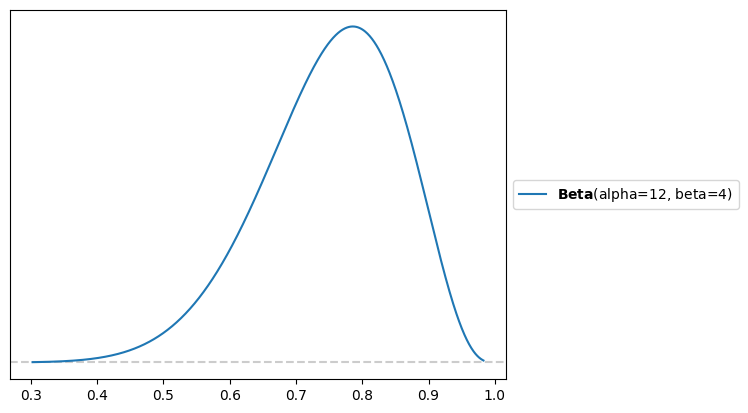

In [ ]:
pz.Beta(alpha=12,beta=4).plot_pdf()

# **Likelihood**
To test out how accurate my prior prediction was for Ronaldo's penalty conversion rate for the 25/26 season, I'm going to use the dataset of all 207 of his penalties taken so far in his professional career, starting in 2006 all the way up to the 24/25 season. I will track how many penalties he either scores or misses, and use this data to make a prediction.

In [ ]:
!pip install preliz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 7.7 MB/s eta 0:00:00


In [ ]:
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

<Axes: >

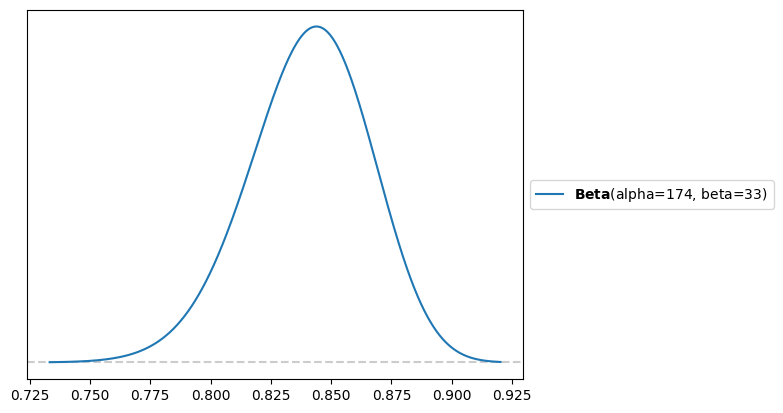

In [ ]:
pz.Beta(alpha=174,beta=33).plot_pdf()

<Axes: >

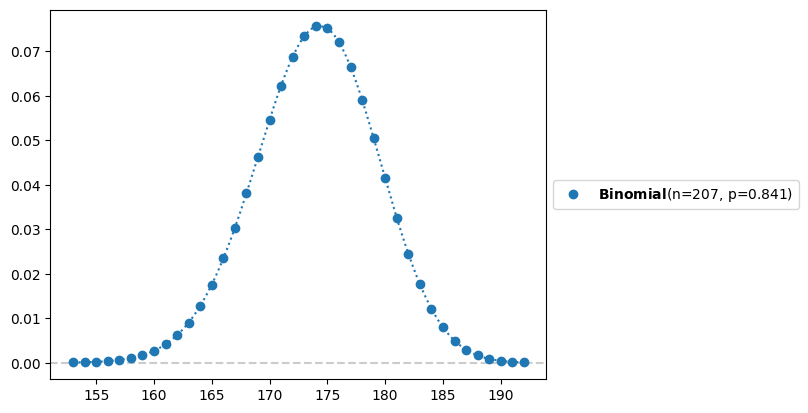

In [ ]:
pz.Binomial(n = 207, p = 174/207 ).plot_pdf()

# **Posterior**
Now I'll combine my likelihood with my prior to make my true prediction

In [ ]:
PK_makes = np.repeat(1, 174)

PK_misses = np.repeat(0, 33)

PK_data = np.concatenate( [PK_makes,PK_misses] )

In [ ]:
with pm.Model() as Cr7_FT_model:
  #we define our prior with the makes and misses from Euroleague
  #notice how we make alpha and beta floats by using '.'
  θ = pm.Beta('θ' , alpha = 12. , beta = 4.)

  #we define our likelihood, which is how we process the free throws
  #we've seen Wemby make in the NBA
  #Think of Bernoulli as a stand in for the binomial distribution
  #This allow us to predict one free throw at a time later, among other things
  y = pm.Bernoulli('y', p = θ, observed = PK_data)

  #this part is new. We sample from our posterior because we don't actually
  #have a formula for it.
  idata_PK = pm.sample()

Output()

<Axes: title={'center': 'θ'}>

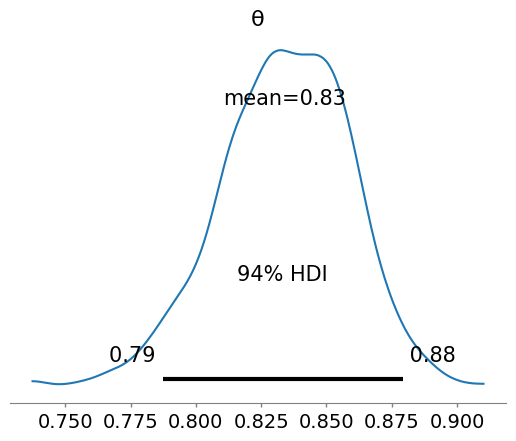

In [ ]:
az.plot_posterior(idata_PK)

# **Conclusion**
In conclusion, my prior prediction was slightly inaccurate at 75%, however it was pretty close to the final posterior prediction, which indicates Ronaldo will likely score somewhere between 79-88% of the penalties he takes,